In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

# X = x-axis spatial coordinate
# Y = y-axis spatial coordinate
# FFMC - FFMC index - numeric rating of moisture content in litter
# DMG - DMC index - moisture of decomposed organic material
# DC - DC index - drying index within soil
# ISI - ISI index - index combining fire indicator and rate of fire spread
# temp - degrees celcius
# RH - Humidity
# wind = wind speed
# rain - total rainfall in mm/m2
# area - burned forest area


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
df.sample(10)
#lots of rain/area at 0?

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
297,8,6,jun,sun,90.4,89.5,290.8,6.4,15.4,45,2.2,0.0,0.00
364,6,5,sep,tue,91.9,111.7,770.3,6.5,21.1,35,2.7,0.0,5.65
268,3,4,aug,tue,92.1,152.6,658.2,14.3,21.0,32,3.1,0.0,0.00
119,3,4,aug,thu,93.0,75.3,466.6,7.7,19.6,36,3.1,0.0,0.00
45,5,6,sep,wed,94.3,85.1,692.3,15.9,25.9,24,4.0,0.0,0.00
85,1,2,sep,thu,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,0.00
366,4,5,sep,tue,91.1,132.3,812.1,12.5,15.9,38,5.4,0.0,1.75
331,7,4,sep,sat,91.2,124.4,795.3,8.5,21.5,28,4.5,0.0,15.64
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
234,4,5,sep,sat,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88


In [5]:
df.isnull().sum() #no missing values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
print(df['area'].value_counts()) #about half equal 0, meaning no area burned half the time

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64


In [7]:
print((df['area'] > 6).sum())
df.loc[df['area'] > 6]
df['size'] = df['area'].apply(lambda x: 1 if x >= 6 else 0) #if area >= 6, equal large, labelled as 1, otherwise, 0, small

139


In [8]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.268859
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [9]:
df.shape

(517, 14)

In [10]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# split the column into multiple columns with each month
for i in months:
    df[i] = df['month'].apply(lambda x: 1 if x == i else 0)
    
# drop the original month column
df = df.drop('month', axis=1)

In [11]:
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# split the column into multiple columns with each day of the week
for i in days:
    df[i] = df['day'].apply(lambda x: 1 if x == i else 0)

# drop the original day_of_week column
df = df.drop('day', axis=1)

In [12]:
df = df.reindex(columns = [col for col in df.columns if col != 'size'] + ['size'])
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,nov,dec,mon,tue,wed,thu,fri,sat,sun,size
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,1,0,0,0,0,0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,1,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,1,1
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,1,1
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,1,1
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
X = df.iloc[:,2:30]
Y = df.iloc[:,30]

In [14]:
print(X.head()) #can see that rain not taken here as intended
print(Y.head()) # DV

   FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  jan  ...  oct  nov  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0    0  ...    0    0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0    0  ...    1    0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0    0  ...    1    0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0    0  ...    0    0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0    0  ...    0    0   

   dec  mon  tue  wed  thu  fri  sat  sun  
0    0    0    0    0    0    1    0    0  
1    0    0    1    0    0    0    0    0  
2    0    0    0    0    0    0    1    0  
3    0    0    0    0    0    1    0    0  
4    0    0    0    0    0    0    0    1  

[5 rows x 28 columns]
0    0
1    0
2    0
3    0
4    0
Name: size, dtype: int64


In [15]:
model = Sequential() #sequential as is time series data
model.add(Dense(20, input_dim = 28, activation = 'relu')) #1st layer input_dim = number of inputs (number of X vars)
model.add(Dense(10, activation = 'relu')) #2nd layer
model.add(Dense(10, activation = 'relu')) #3rd layer
model.add(Dense(1, activation = 'sigmoid')) #final, output layer

# Dense - fully connected
# relu - rectified linear unit (allows for non-linearity)
# constrained to 0 and 1 (output layer)

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) #log loss for adjusted predictions, adam optimizer - extended SGD
model.summary() #Checking each layer to ensure correct dimensionality

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                580       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [17]:
predictor = model.fit(X, Y, validation_split = 0.25, epochs = 300, batch_size = 10) #Model Fitting

Epoch 1/300
39/39 [==============================] - 1s 4ms/step - loss: 2.6589 - accuracy: 0.5581 - val_loss: 1.6134 - val_accuracy: 0.2846
Epoch 2/300
39/39 [==============================] - 0s 1ms/step - loss: 0.9973 - accuracy: 0.6977 - val_loss: 1.2682 - val_accuracy: 0.7077
Epoch 3/300
39/39 [==============================] - 0s 2ms/step - loss: 0.8215 - accuracy: 0.7468 - val_loss: 0.8408 - val_accuracy: 0.5538
Epoch 4/300
39/39 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7545 - val_loss: 1.0060 - val_accuracy: 0.5462
Epoch 5/300
39/39 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7855 - val_loss: 1.1214 - val_accuracy: 0.4923
Epoch 6/300
39/39 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7959 - val_loss: 0.7115 - val_accuracy: 0.5923
Epoch 7/300
39/39 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8191 - val_loss: 0.7480 - val_accuracy: 0.5846
Epoch 8/300
3

In [18]:
scores = model.evaluate(X, Y) #Model Evaluation - accuracy
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 626us/step - loss: 0.1625 - accuracy: 0.9594
accuracy: 95.94%


In [19]:
predictor.history.keys() #Obtaining Keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

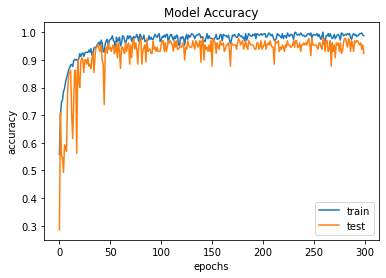

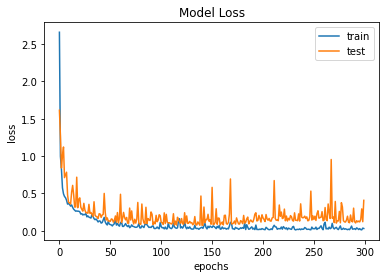

In [20]:
# Plotting summarized history for accuracy
plt.plot(predictor.history['accuracy'])
plt.plot(predictor.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Plotting summarized history for loss
plt.plot(predictor.history['loss'])
plt.plot(predictor.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()